C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\backtesting\_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


Loading BokehJS ...

<Axes: xlabel='Date'>

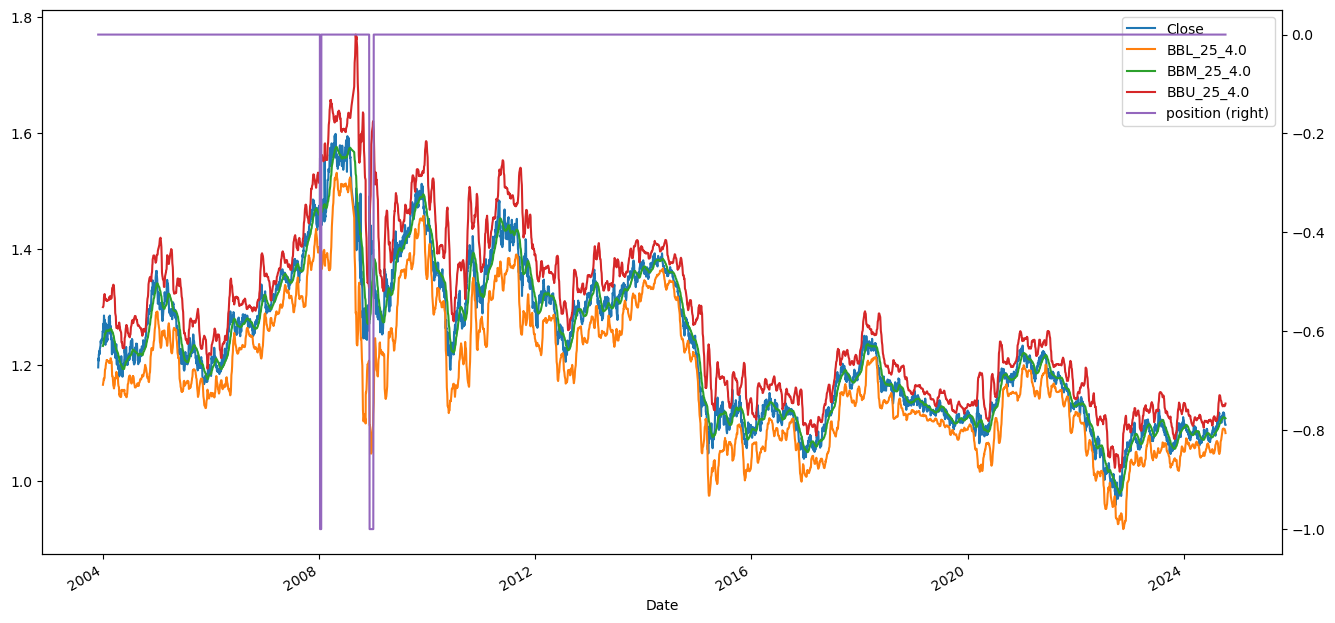

In [1]:
import pandas as pd
import pandas_ta as ta
import numpy as np
import mplfinance as mpf
from backtesting import Backtest, Strategy


# Load the data
df = pd.read_csv("EURUSD.csv", parse_dates=[0], index_col=0)
df = df.Close.to_frame()
# df = df.loc["2021"]


bb = ta.bbands(df['Close'], length=25, std=4).iloc[:,:3]

df = pd.concat([df, bb], axis=1)

df["distance"] = df.Close - df.iloc[:,2]
df["position"] = np.where(df.Close < df.iloc[:,1], 1, np.nan)
df["position"] = np.where(df.Close > df.iloc[:,3], -1, df["position"])
df["position"] = np.where(df.distance.shift(1) * df.distance < 0,0, df["position"])

df["position"] = df.position.ffill().fillna(0)

df.drop("distance",axis=1).plot(figsize=(16,8),secondary_y=["position"])

# df.position.value_counts()


In [42]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
import pandas as pd
import pandas_ta as ta
import numpy as np


df = pd.read_csv("EURUSD.csv", parse_dates=[0], index_col=0)
df = df.loc["2010":]

def bb_band(df,len,std):
    df = df.Close.to_frame()
    bb = ta.bbands(df['Close'], length=len, std=std)
    df = pd.concat([df, bb], axis=1)
    
    df["distance"] = df.Close - df.iloc[:,2]
    df["position"] = np.where(df.Close < df.iloc[:,1], 1, np.nan)
    df["position"] = np.where(df.Close > df.iloc[:,3], -1, df["position"])
    df["position"] = np.where(df.distance.shift(1) * df.distance < 0,0, df["position"])

    df["position"] = df.position.ffill().fillna(0)
    return df.position.to_frame()
    # return df.drop(df.iloc[:,[-2,-3,-4]],axis=1) #.position.to_frame()

bb_band(df,25,4)#.position.value_counts()


# bb_band(df,25,4).plot(figsize=(16,8),secondary_y=["position"])
# df/

,position
Date,
2010-01-01,0.0
2010-01-04,0.0
2010-01-05,0.0
2010-01-06,0.0
2010-01-07,0.0
...,...
2024-10-03,0.0
2024-10-04,0.0
2024-10-07,0.0


In [43]:
   
class BackTest(Strategy):
    # mysize = 10
    len = 20
    std = 2
    
    def init(self):
        position = self.I(bb_band, self.data.df, self.len, self.std)
        self.position_indicator = position
    def next(self):
        current_position = self.position_indicator[-1]

        if current_position == 1 and not self.position.is_long:
            self.position.close()
            self.buy()#size=self.mysize)
        
        elif current_position == -1 and not self.position.is_short:
            self.position.close()
            self.sell()#size=self.mysize)

bt = Backtest(df,BackTest,cash=10_000)

# state = bt.optimize(
#     std = range(1,5,1),
#     len = range(10,100,1),
#     maximize='Equity Final [$]' #, 'Profit Factor', 'Win Rate [%]'] 
#     # constraint=lambda param : param.len > param.std# Use skopt for optimizatio   
# )

state = bt.run()

state#.to_frame()
bt.plot()  # Disables plotting indicators entirely


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%d %b'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\backtesting\_plotting.py:250: UserWarning: DatetimeFormatter scales now only accept a single format. Using the first provided: '%m/%Y'
  formatter=DatetimeTickFormatter(days=['%d %b', '%a %d'],
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\backtesting\_plotting.py:456: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample(resample_rule, label='left')
C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\backtesting\_plotting.py:659: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  fig = gridplot(
C:\Users\Admin\AppData\Roaming\Python\Pyth

GridPlot(id='p5085', ...)

In [44]:
state[1]

C:\Users\Admin\AppData\Local\Temp\ipykernel_3056\2014515776.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  state[1]


Timestamp('2024-10-09 00:00:00')

In [5]:
df = state[1].to_frame()
# df.iloc[:,0]
np.argmax(df.iloc[:,0])

# np.argmax(df.iloc[:,:0])
df.iloc[287,:]
# df

C:\Users\Admin\AppData\Local\Temp\ipykernel_3056\1715691478.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df = state[1].to_frame()


AttributeError: 'Timestamp' object has no attribute 'to_frame'